# Math105A homework

Please do the following (non-graded) homework taken from the Text in preparation for a (graded) quiz on Thursday 10/12. 

Round-off error: Section 1.2: 2c, 3d, 12

Bisection method: Section 2.1: 3a, 5b, 11c, 14

# Math105LA computer assignment

Please fill the remainder of this notebook with your code (remove `pass` after "# your code here"), execute all cells, save the notebook on your machine, and upload the notebook only (i.e. not any other files in this archive) to the [Math105LA Assign01 Dropbox](https://eee.uci.edu/toolbox/dropbox/) by the deadline indicated in the Dropbox. A primer on Dropbox is [here](https://eee.uci.edu/help/dropbox/instructors/_assets/dropbox_primer.pdf).



### Problem 1

Consider the function 

$$ f(x) = \frac{1}{4} - \frac{\sin(4x)}{x}.$$

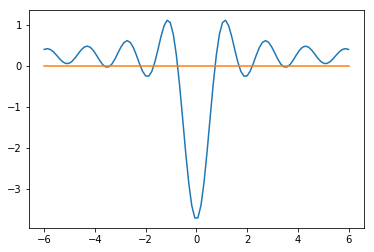

In [1]:
import numpy as np 
f = lambda x: 0.25 - np.sin(4*x)/x
g = lambda x: 0*x
x = np.linspace(-6,6,100)

from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(x, f(x))
plt.plot(x, g(x))

In class we described how to use the bisection method to compute a root. The following are two implementations of the bisection method. 

In [2]:
def different_sign(a, b):
    return a * b < 0.0

def bisection_core(func, low, high, n_max): 
    for i in range(n_max):
        midpoint = (low + high) / 2.0
        if different_sign(func(low), func(midpoint)):
            high = midpoint
        else:
            low = midpoint
    return midpoint
    
def bisection_v1(func, low, high, n_max):

    if different_sign(func(low), func(high)):
        return bisection_core(func, low, high, n_max)
    else: 
        return None

def bisection_v2(func, low, high, n_max):

    assert different_sign(func(low), func(high))
    
    return bisection_core(func, low, high, n_max)

Write a python function `multi_bisection` to compute all 10 roots of $f(x)$. 

In [7]:
def multi_bisection_core_v1(ps, func, low, high, n_max): 
    # this function alters the list ps,
    # rather than just copying it to a local variable
    
    p = bisection_v1(func, low, high, n_max)
    if p is not None:
        ps += [p]   

def multi_bisection_core_v2(ps, func, low, high, n_max): 
    # this function alters the list ps,
    # rather than just copying it to a local variable
    
    if func(low)*func(high) < 0.0:
        ps += [bisection_v2(func, low, high, n_max)]   

def multi_bisection(func, grid, n_max): 
    '''
    input: 
        func = function whose roots we want to compute
        grid = numpy array containing a grid of points spanning the interval containing roots
        n_max = maximum number of iterations
    output: 
        returns a python list whose elements are the roots we want to compute
        '''
    
    ps = []
    lowers = grid[:-1]
    uppers = grid[1:]
    for lower, upper in zip(lowers,uppers): 
#         multi_bisection_core_v1(ps, func, lower, upper, n_max)
        multi_bisection_core_v2(ps, func, lower, upper, n_max)
    return ps

roots = multi_bisection(func=f, grid=x, n_max=100)
print 'roots = ', roots
print
print 'max value of |f(roots)| = ', np.vectorize(f)(roots).max() if roots != None else None

roots =  [-3.6410164707276547, -3.3949964664510857, -2.2098644955973947, -1.6790953589566251, -0.73894715476012962, 0.73894715476012962, 1.6790953589566251, 2.2098644955973947, 3.3949964664510857, 3.6410164707276547]

max value of |f(roots)| =  3.88578058619e-16
